# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
#enumerate assigns a numerical index to each city
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        #Pause for a second before making another request
        time.sleep(1)
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | malanje
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 4 of Set 1 | vilyuchinsk
Processing Record 5 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 6 of Set 1 | vorgashor
Processing Record 7 of Set 1 | aasiaat
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | geraldton
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | dampit
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | kashgar
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | nuuk
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | wenchang
Processing Record 21 of Set 1 | mi

Processing Record 25 of Set 8 | torrington
Processing Record 26 of Set 8 | krutikha
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | zaysan
Processing Record 29 of Set 8 | mana
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | mandera
Processing Record 32 of Set 8 | numan
Processing Record 33 of Set 8 | pingliang
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | lerik
Processing Record 46 of Set 8 | quelimane
Processing Record 47 of Set 8 | katyuzhanka
P

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,malanje,-9.5402,16.3410,63.86,98,92,1.90,AO,1735247946
1,port-aux-francais,-49.3500,70.2167,41.25,83,84,42.19,TF,1735247947
2,vilyuchinsk,52.9306,158.4028,7.07,85,92,5.88,RU,1735247950
3,vorgashor,67.5833,63.9500,21.79,96,100,13.42,RU,1735247952
4,aasiaat,68.7098,-52.8699,0.68,93,100,8.55,GL,1735247953


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,malanje,-9.5402,16.3410,63.86,98,92,1.90,AO,1735247946
1,port-aux-francais,-49.3500,70.2167,41.25,83,84,42.19,TF,1735247947
2,vilyuchinsk,52.9306,158.4028,7.07,85,92,5.88,RU,1735247950
3,vorgashor,67.5833,63.9500,21.79,96,100,13.42,RU,1735247952
4,aasiaat,68.7098,-52.8699,0.68,93,100,8.55,GL,1735247953


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

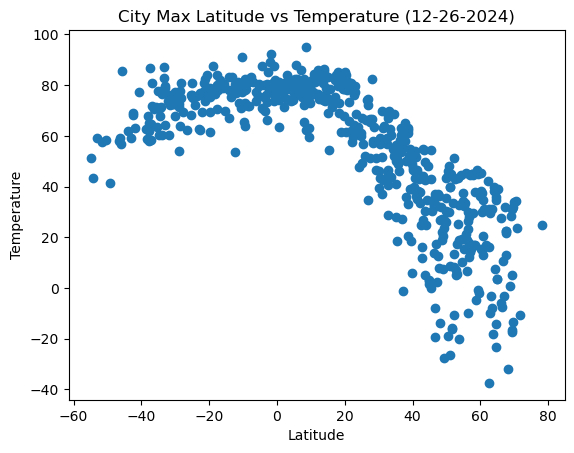

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df['Lat'],city_data_df['Max Temp'],
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

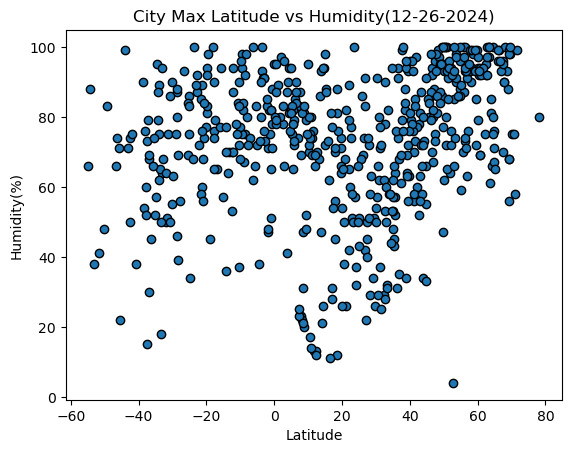

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df['Lat'],city_data_df['Humidity'],
    edgecolor = "black"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Humidity(%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

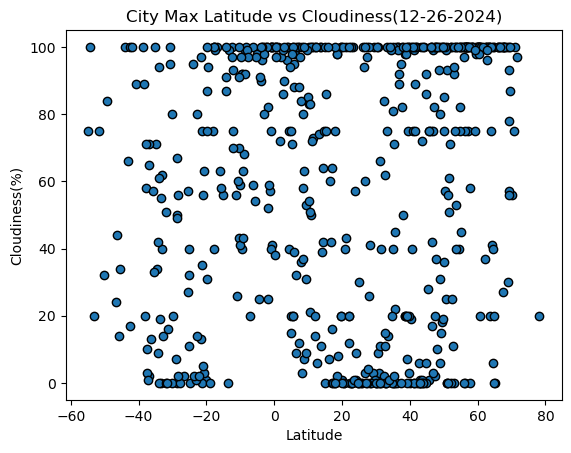

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df['Lat'],city_data_df['Cloudiness'],
    edgecolor = "black"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Cloudiness(%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

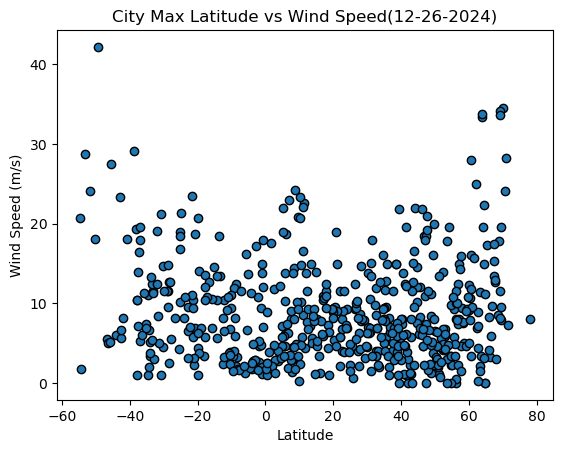

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df['Lat'],city_data_df['Wind Speed'],
    edgecolor = "black"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Wind Speed(%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [115]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color ="blue"):

    #Compute LinReg 
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #plot 
    plt.scatter(x_values, y_values, edgecolor = "black")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, color='red')
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {r_value**2:.2f}")
    plt.show()


In [117]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,vilyuchinsk,52.9306,158.4028,7.07,85,92,5.88,RU,1735247950
3,vorgashor,67.5833,63.9500,21.79,96,100,13.42,RU,1735247952
4,aasiaat,68.7098,-52.8699,0.68,93,100,8.55,GL,1735247953
5,sitka,57.0531,-135.3300,44.49,76,75,14.97,US,1735247954
10,stanley,54.8680,-1.6985,37.51,96,82,2.28,GB,1735247960


In [119]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,malanje,-9.5402,16.3410,63.86,98,92,1.90,AO,1735247946
1,port-aux-francais,-49.3500,70.2167,41.25,83,84,42.19,TF,1735247947
6,geraldton,-28.7667,114.6000,54.01,87,0,11.50,AU,1735247955
7,papatowai,-46.5619,169.4708,57.96,66,24,5.48,NZ,1735247957
8,atafu village,-8.5421,-172.5159,82.62,75,99,12.44,TK,1735247958


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.69


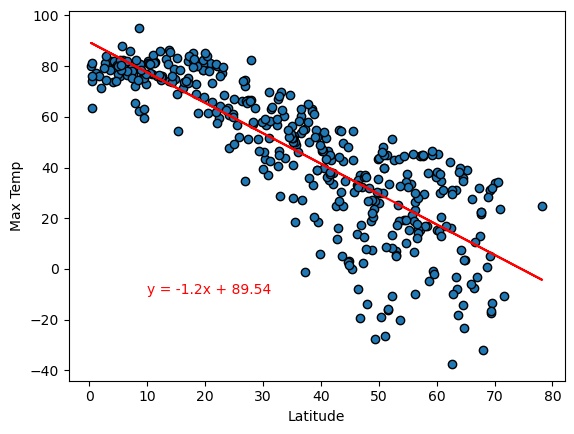

In [122]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df ['Max Temp']
plot_linear_regression(x_values, y_values, "Max Temp", (10, -10))

The r-value is: 0.33


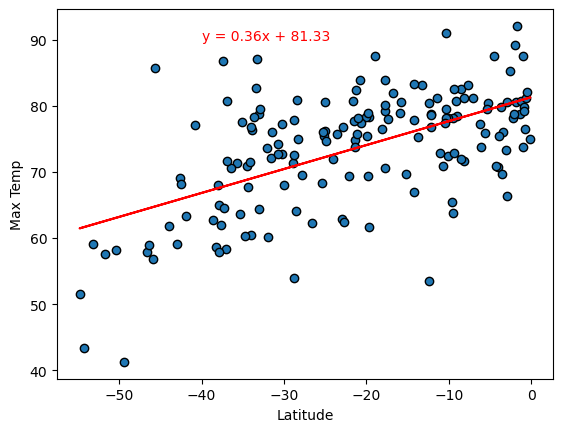

In [124]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, "Max Temp", (-40, 90))

**Discussion about the linear relationship:** The northern hemisphere has an r-value of 0.69 which shows a moderate, almost strong, relationship between maximum temperature and latitude where temperatures decreases as latitude increases. On the other hand,the southern hemisphere has an r-value of 0.33. This shows a weaker relationship between temperature and latitude. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.14


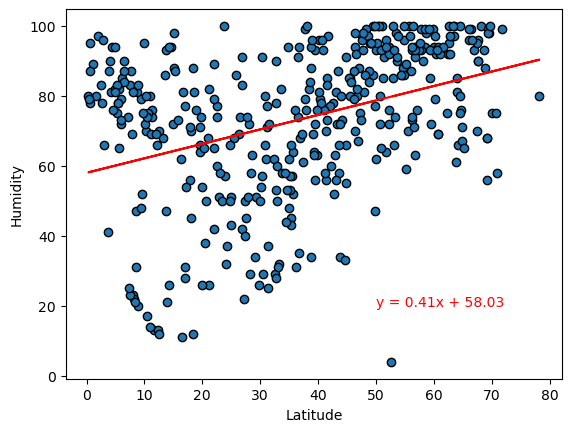

In [130]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df ['Humidity']
plot_linear_regression(x_values, y_values, "Humidity", (50, 20))

The r-value is: 0.09


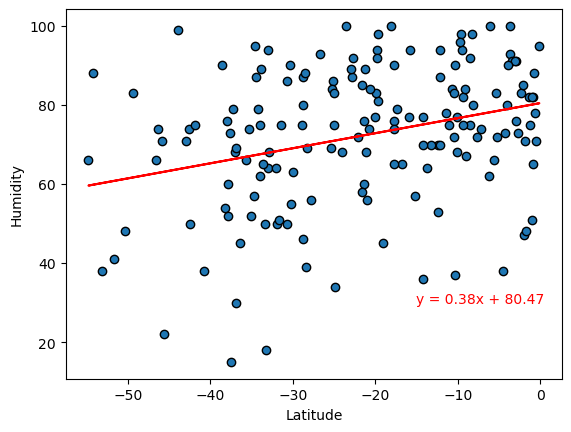

In [136]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Humidity", (-15, 30))

**Discussion about the linear relationship:** The low r-values for both hemispheres indicates that there is no relationship between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02


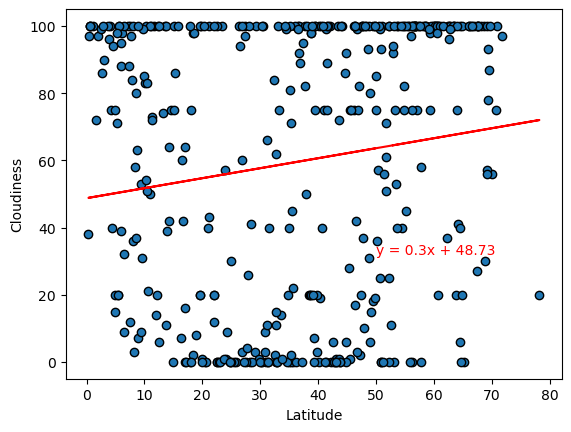

In [144]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df ['Cloudiness']
plot_linear_regression(x_values, y_values, "Cloudiness", (50, 32))

The r-value is: 0.12


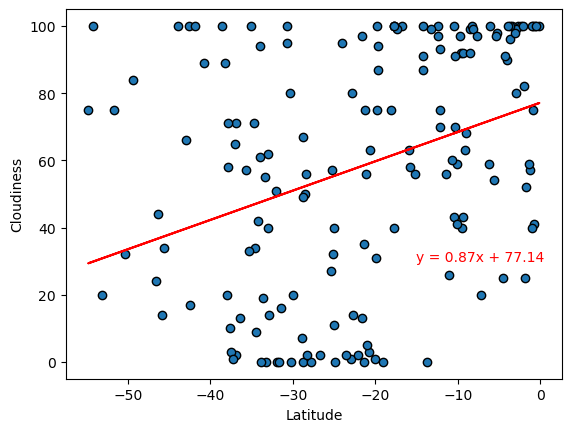

In [146]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Cloudiness", (-15, 30))

**Discussion about the linear relationship:** There is a very low r-value for both hemispheres which indicates that there is no relationship between cloudiness and latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02


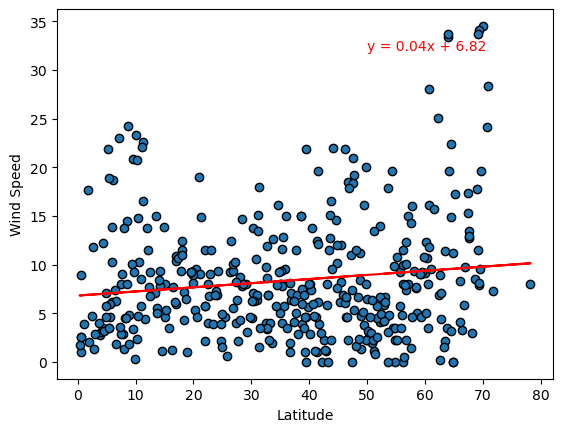

In [149]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df ['Wind Speed']
plot_linear_regression(x_values, y_values, "Wind Speed", (50, 32))

The r-value is: 0.14


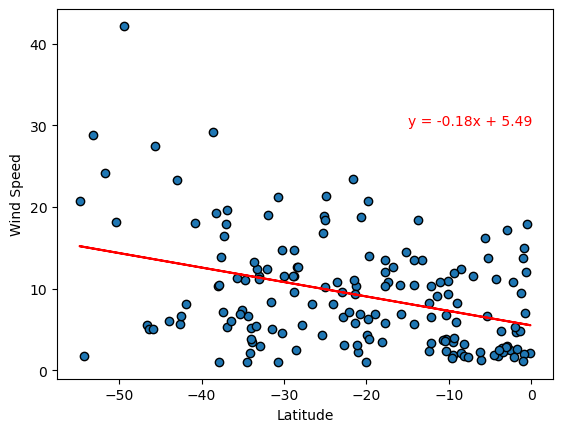

In [151]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Wind Speed", (-15, 30))

**Discussion about the linear relationship:** The low r-value for the northern and southern hemisphere indicates either no relationship  between Wind Speed and Latitude. 